#### Adjust Data Ranges

In [1]:
# Load libraries
import numpy as np
import pandas as pd
from pandas import Series, DataFrame, set_option
from pandas.plotting import scatter_matrix
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pylab
from numpy import mean
from numpy import std

%matplotlib inline

set_option('display.width', 100)
set_option('precision', 3)

# set default matplot figure size
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

In [2]:
# Load dataset
url = '.\data\CreditOne-CCC.csv'
names = ['Id', 'TotalLoan', 'Gender', 'Education', 'MaritalStatus', 'Age', 
         'HstPaySep15', 'HstPayAug15', 'HstPayJul15', 'HstPayJun15', 'HstPayMay15', 'HstPayApr15', 
         'BillSep15', 'BillAug15', 'BillJul15', 'BillJun15', 'BillMay15', 'BillApr15', 
         'PaySep15', 'PayAug15', 'PayJul15', 'PayJun15', 'PayMay15', 'PayApr15', 
         'DefaultPayment']

df = pd.read_csv(url, sep=",", names=names)

print('Rows and columns count:', df.shape)

Rows and columns count: (30000, 25)


#### Data: Total Loan

**Note**. X1 (LIMIT_BAL): Amount of the given credit (new taiwanese dollar): it includes both the individual consumer credit and his/her family (supplementary) credit

count      30000.000
mean      167484.323
std       129747.662
min        10000.000
25%        50000.000
50%       140000.000
75%       240000.000
max      1000000.000
Name: TotalLoan, dtype: float64


Text(0.5, 1.0, 'Distribution by Total Loan')

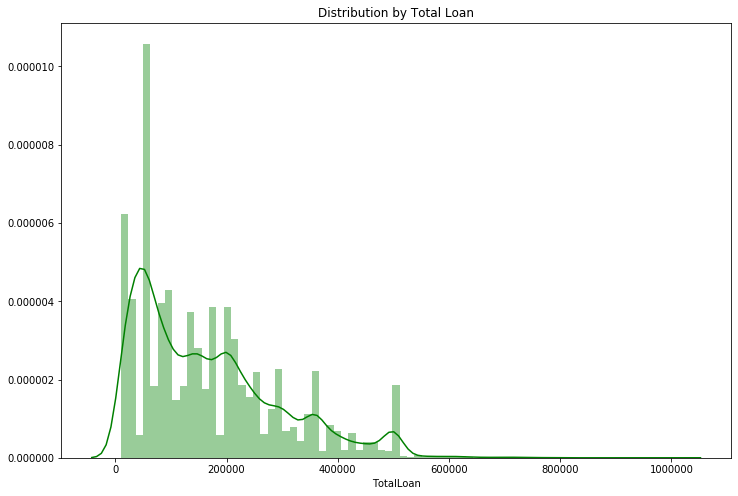

In [3]:
# plot: Total loan Distribution
print(df['TotalLoan'].describe())

plt.figure(figsize=(12, 8))
tl_dist = sns.distplot(df['TotalLoan'], color='g', bins=75, hist_kws={'alpha': 0.4});
tl_dist.set_title("Distribution by Total Loan")

The 'standardization' of the attribute values is considered during the data transformation stage. Through which the attributes are transformed with a 'Gaussian Distribution' to a 'Standard Gaussian Distribution' (0 mean and 1 std).

#### Handling Outliers: Total Loan (OPTIONAL)

In [145]:
# identify outliers
dfbs_mean, dfbs_std = mean(df['TotalLoan']), std(df['TotalLoan'])
    
    # identify outliers
dfbs_off = dfbs_std * 3
lower, upper = dfbs_mean - dfbs_off, dfbs_mean + dfbs_off

In [147]:
print(df['TotalLoan'].describe())

df.drop(df[df.TotalLoan >= upper].index, inplace=True)
df.drop(df[df.TotalLoan <= lower].index, inplace=True)

count     29870.000
mean     165431.526
std      126154.328
min       10000.000
25%       50000.000
50%      140000.000
75%      240000.000
max      550000.000
Name: TotalLoan, dtype: float64


count     29870.000
mean     165431.526
std      126154.328
min       10000.000
25%       50000.000
50%      140000.000
75%      240000.000
max      550000.000
Name: TotalLoan, dtype: float64


Text(0.5, 1.0, 'Distribution by Total Loan')

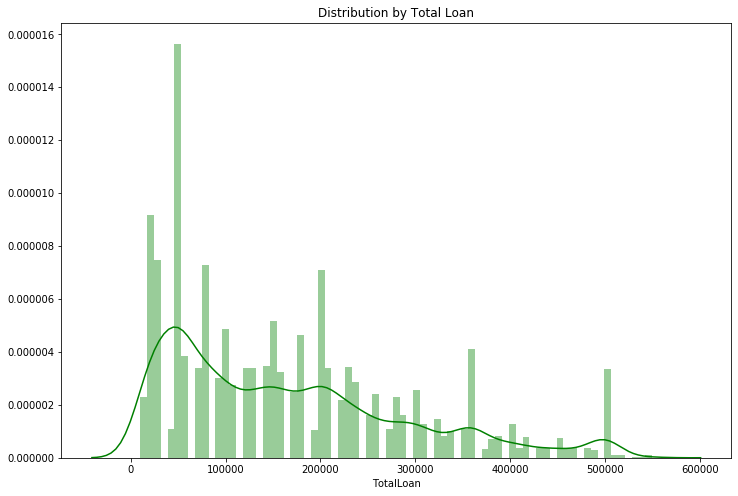

In [148]:
# plot: Total loan Distribution
print(df['TotalLoan'].describe())

plt.figure(figsize=(12, 8))
tl_dist = sns.distplot(df['TotalLoan'], color='g', bins=75, hist_kws={'alpha': 0.4});
tl_dist.set_title("Distribution by Total Loan")

#####  Rescaling: Total Loand

In [142]:
# Standardize data (0 mean, 1 stdev)
from sklearn.preprocessing import StandardScaler
from numpy import set_printoptions

array = df['TotalLoan'].values

# separate array into input and output components
X = array.reshape(-1, 1) 
scaler = MinMaxScaler(feature_range=(0, 1))
df['TotalLoan']  = scaler.fit_transform(X)

# summarize transformed data
set_printoptions(precision=3)
print(df['TotalLoan'].describe())

count    29870.000
mean         0.288
std          0.234
min          0.000
25%          0.074
50%          0.241
75%          0.426
max          1.000
Name: TotalLoan, dtype: float64


Text(0.5, 1.0, 'Distribution by Total Loan')

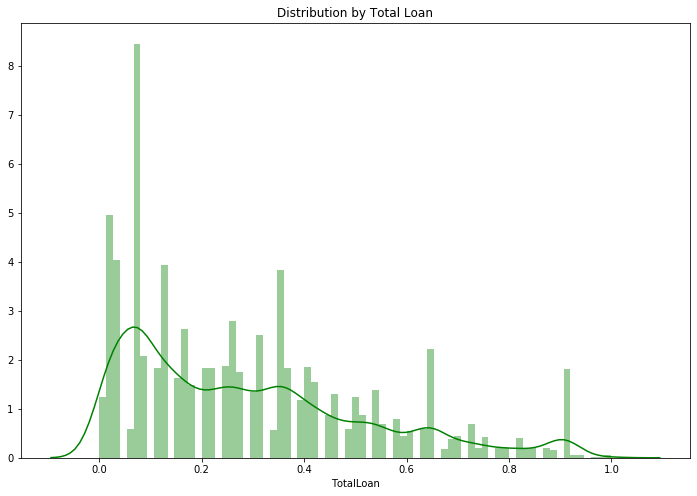

In [143]:
# plot: Total loan Distribution
plt.figure(figsize=(12, 8))
tl_dist = sns.distplot(df['TotalLoan'], color='g', bins=75, hist_kws={'alpha': 0.4});
tl_dist.set_title("Distribution by Total Loan")

##### Standarization: Total Loan

In [150]:
# Standardize data (0 mean, 1 stdev)
from sklearn.preprocessing import StandardScaler
from numpy import set_printoptions

array = df['TotalLoan'].values

# separate array into input and output components
X = array.reshape(-1, 1) 
scaler = StandardScaler().fit(X)
df['TotalLoan'] = scaler.transform(X)

# summarize transformed data
set_printoptions(precision=3)
print(df['TotalLoan'].describe())

count    2.987e+04
mean    -5.702e-17
std      1.000e+00
min     -1.232e+00
25%     -9.150e-01
50%     -2.016e-01
75%      5.911e-01
max      3.048e+00
Name: TotalLoan, dtype: float64


Text(0.5, 1.0, 'Distribution by Total Loan')

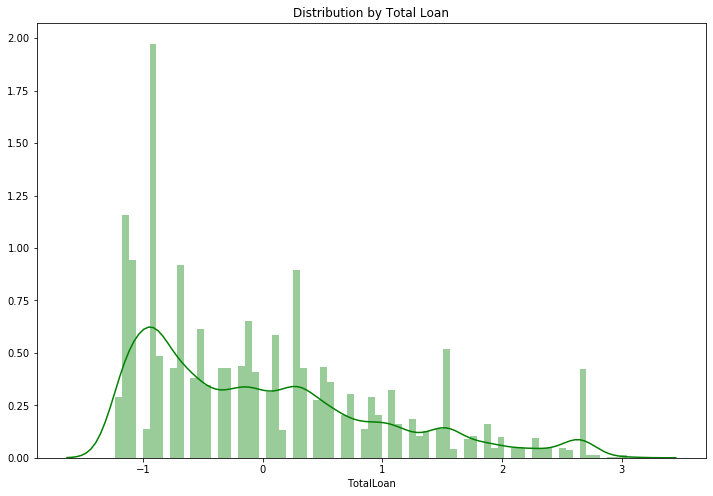

In [151]:
# plot: Total loan Distribution
plt.figure(figsize=(12, 8))
tl_dist = sns.distplot(df['TotalLoan'], color='g', bins=75, hist_kws={'alpha': 0.4});
tl_dist.set_title("Distribution by Total Loan")

#### Data: Gender

**Note**. X2 (SEX): Gender (1 = male; 2 = female).

Gender
1    11888
2    18112
dtype: int64


 Male: 39.63
 Famale: 60.37




Text(0.5, 1.0, 'Distribution by Gender')

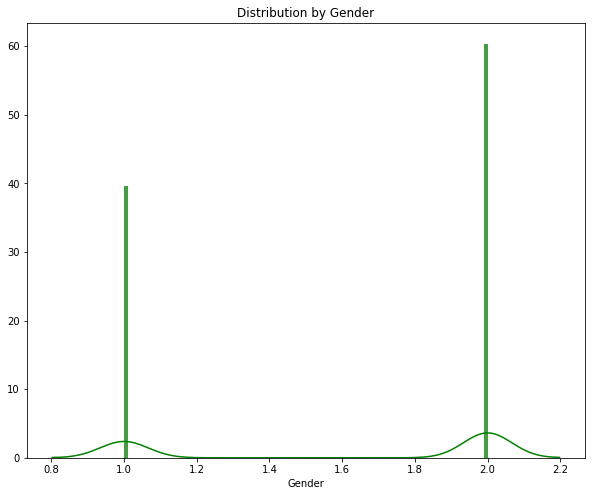

In [4]:
# (Male = 1, Female = 2)
Gender_counts = df.groupby('Gender').size()
print(Gender_counts)
print('\n')

set_option('precision', 3)
print(' Male: %.2f' % ((Gender_counts[1]/len(df))*100))
print(' Famale: %.2f' % ((Gender_counts[2]/len(df))*100))
print('\n')

# plot: Total loan Distribution
plt.figure(figsize=(10, 8))
tl_dist = sns.distplot(df['Gender'], color='g', bins=100, hist_kws={'alpha': 0.75});
tl_dist.set_title("Distribution by Gender")

We can see that the gender class shows an 'imbalance' where for each male there are approximately 1.5 women. This gives us 50% more observations of the female gender than the male.

#### Data: Education

**Note**. X3: (Education) (1 = graduate school; 2 = university; 3 = high school; 4 = others, 5 = Not defined, 6 = Not defined).

In [5]:
edu_counts = df.groupby('Education').size()
print(edu_counts)

Education
0       14
1    10585
2    14030
3     4917
4      123
5      280
6       51
dtype: int64


It is possible to appreciate that there are observations in the category '0' that do not correspond to the proposed classification, in addition the classifications: 'others' and 'not defined' show the lowest counts.
In order to improve readability the classification '0' will be added to the closest classification '1', since it does not represent a significant volume
While classifications 4, 5 and 6 (others and not defined) will be added in a single classification, since 4 is clearly better representative we will use this one.

In [6]:
# replace values
df.Education.replace({0 : 1, 5: 4, 6: 4}, inplace=True)

In [9]:
edu_counts = df.groupby('Education').size()
print(edu_counts)

Education
1    10599
2    14030
3     4917
4      454
dtype: int64


#### Data: MaritalStatus
**Note. X4 (MARRIAGE): Marital status (0 = Not defined, 1 = married; 2 = single; 3 = others).

In [10]:
mstatus_counts = df.groupby('MaritalStatus').size()
print(mstatus_counts)

MaritalStatus
0       54
1    13659
2    15964
3      323
dtype: int64


It is possible to appreciate that there are observations in the category '0' that do not correspond to the proposed classification, in addition to the classifications: 'others' shows the lowest counts.
To reduce the 'imbalance' of the class, the classification '0' will be added to the classification '3', since it does not represent a significant volume

In [11]:
# replace values
df.MaritalStatus.replace({0 : 3}, inplace=True)

In [12]:
mstatus_counts = df.groupby('MaritalStatus').size()
print(mstatus_counts)

MaritalStatus
1    13659
2    15964
3      377
dtype: int64


#### Data: Age
**Note**. X5: (Age) years 21-79.

In [18]:
print(df['Age'].describe())

count    30000.000
mean        35.486
std          9.218
min         21.000
25%         28.000
50%         34.000
75%         41.000
max         79.000
Name: Age, dtype: float64


##### Age Class: 4 ranges

In [19]:
pd.cut(df['Age'], bins=4)

0        (20.942, 35.5]
1        (20.942, 35.5]
2        (20.942, 35.5]
3          (35.5, 50.0]
4          (50.0, 64.5]
              ...      
29995      (35.5, 50.0]
29996      (35.5, 50.0]
29997      (35.5, 50.0]
29998      (35.5, 50.0]
29999      (35.5, 50.0]
Name: Age, Length: 30000, dtype: category
Categories (4, interval[float64]): [(20.942, 35.5] < (35.5, 50.0] < (50.0, 64.5] < (64.5, 79.0]]

In [28]:
df4 = df
df4.Age.describe()

count    30000.000
mean        35.486
std          9.218
min         21.000
25%         28.000
50%         34.000
75%         41.000
max         79.000
Name: Age, dtype: float64

In [29]:
condi4 = [
            (df4.Age >= 20.8) & (df4.Age < 35.5),
            (df4.Age >= 35.5) & (df4.Age < 50.0),
            (df4.Age >= 50.0) & (df4.Age < 64.5),
            (df4.Age >= 64.5) & (df4.Age < 80)
        ]
elecc4 = np.array((1, 2, 3, 4), dtype="int8")

In [30]:
df4['AgeGroup'] = np.select(condi4, elecc4, 1)

agr4_counts = df4.groupby('AgeGroup').size()
print(agr4_counts)

AgeGroup
1    16809
2    10511
3     2570
4      110
dtype: int64


Text(0.5, 1.0, 'Distribution by Age Group')

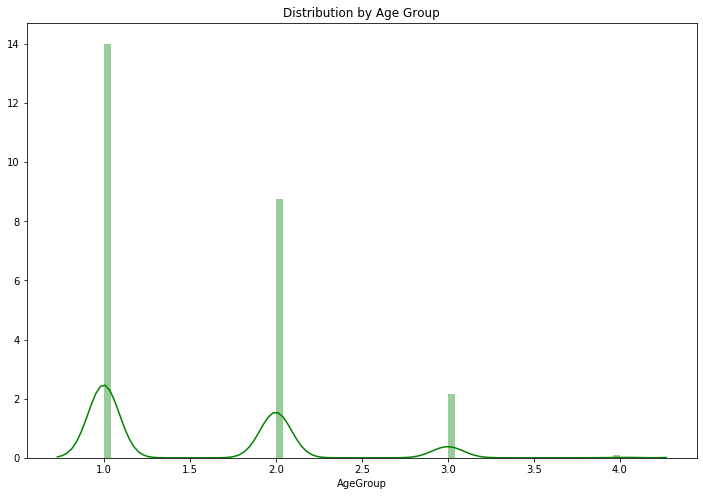

In [31]:
# plot: Age Agroups
plt.figure(figsize=(12, 8))
tl_dist = sns.distplot(df4['AgeGroup'], color='g', bins=75, hist_kws={'alpha': 0.4});
tl_dist.set_title("Distribution by Age Group")

##### Age Class: 5 ranges

In [27]:
pd.cut(df['Age'], bins=5)

0        (20.942, 32.6]
1        (20.942, 32.6]
2          (32.6, 44.2]
3          (32.6, 44.2]
4          (55.8, 67.4]
              ...      
29995      (32.6, 44.2]
29996      (32.6, 44.2]
29997      (32.6, 44.2]
29998      (32.6, 44.2]
29999      (44.2, 55.8]
Name: Age, Length: 30000, dtype: category
Categories (5, interval[float64]): [(20.942, 32.6] < (32.6, 44.2] < (44.2, 55.8] < (55.8, 67.4] < (67.4, 79.0]]

In [33]:
df5 = df
df5.Age.describe()

count    30000.000
mean        35.486
std          9.218
min         21.000
25%         28.000
50%         34.000
75%         41.000
max         79.000
Name: Age, dtype: float64

In [34]:
condi5 = [
            (df5.Age >= 20.8) & (df5.Age < 32.6),
            (df5.Age >= 32.6) & (df5.Age < 44.2),
            (df5.Age >= 44.2) & (df5.Age < 55.8),
            (df5.Age >= 55.8) & (df5.Age < 67.4),
            (df5.Age >= 67.4) & (df5.Age < 80)
        ]
elecc5 = np.array((1, 2, 3, 4, 5), dtype="int8")

In [35]:
df5['AgeGroup'] = np.select(condi5, elecc5, 1)

agr5_counts = df5.groupby('AgeGroup').size()
print(agr5_counts)

AgeGroup
1    13388
2    11326
3     4442
4      799
5       45
dtype: int64


Text(0.5, 1.0, 'Distribution by Age Group')

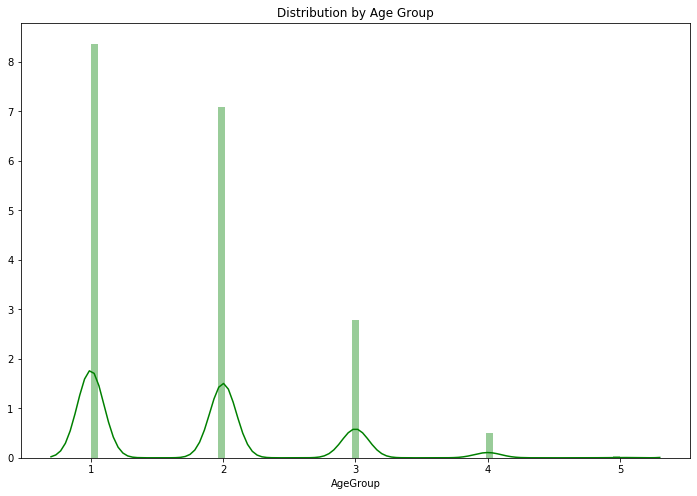

In [36]:
# plot: Age Agroups
plt.figure(figsize=(12, 8))
tl_dist = sns.distplot(df5['AgeGroup'], color='g', bins=75, hist_kws={'alpha': 0.4});
tl_dist.set_title("Distribution by Age Group")

##### Age Class: 8 ranges

In [37]:
pd.cut(df['Age'], bins=8)

0        (20.942, 28.25]
1        (20.942, 28.25]
2          (28.25, 35.5]
3          (35.5, 42.75]
4          (50.0, 57.25]
              ...       
29995      (35.5, 42.75]
29996      (42.75, 50.0]
29997      (35.5, 42.75]
29998      (35.5, 42.75]
29999      (42.75, 50.0]
Name: Age, Length: 30000, dtype: category
Categories (8, interval[float64]): [(20.942, 28.25] < (28.25, 35.5] < (35.5, 42.75] < (42.75, 50.0] < (50.0, 57.25] < (57.25, 64.5] < (64.5, 71.75] < (71.75, 79.0]]

In [38]:
df8 = df
df8.Age.describe()

count    30000.000
mean        35.486
std          9.218
min         21.000
25%         28.000
50%         34.000
75%         41.000
max         79.000
Name: Age, dtype: float64

In [39]:
condi8 = [
            (df8.Age >= 20.80) & (df8.Age < 28.25),
            (df8.Age >= 28.25) & (df8.Age < 35.5),
            (df8.Age >= 35.50) & (df8.Age < 42.75),
            (df8.Age >= 42.75) & (df8.Age < 50.0),
            (df8.Age >= 50.00) & (df8.Age < 57.25),
            (df8.Age >= 57.25) & (df8.Age < 64.5),
            (df8.Age >= 64.50) & (df8.Age < 71.75),
            (df8.Age >= 71.75) & (df8.Age < 80.0)
        ]
elecc8 = np.array((1, 2, 3, 4, 5, 6, 7, 8), dtype="int8")

In [40]:
df8['AgeGroup'] = np.select(condi8, elecc8, 1)

agr8_counts = df8.groupby('AgeGroup').size()
print(agr8_counts)

AgeGroup
1    8013
2    8796
3    6535
4    3976
5    2136
6     434
7      98
8      12
dtype: int64


Text(0.5, 1.0, 'Distribution by Age Group')

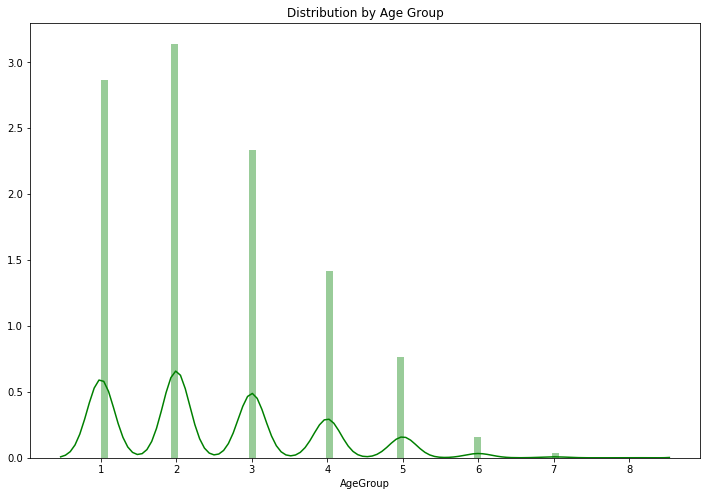

In [41]:
# plot: Age Agroups
plt.figure(figsize=(12, 8))
tl_dist = sns.distplot(df8['AgeGroup'], color='g', bins=75, hist_kws={'alpha': 0.4});
tl_dist.set_title("Distribution by Age Group")

##### Age Class: 10 ranges

In [42]:
pd.cut(df['Age'], bins=10)

0        (20.942, 26.8]
1        (20.942, 26.8]
2          (32.6, 38.4]
3          (32.6, 38.4]
4          (55.8, 61.6]
              ...      
29995      (38.4, 44.2]
29996      (38.4, 44.2]
29997      (32.6, 38.4]
29998      (38.4, 44.2]
29999      (44.2, 50.0]
Name: Age, Length: 30000, dtype: category
Categories (10, interval[float64]): [(20.942, 26.8] < (26.8, 32.6] < (32.6, 38.4] < (38.4, 44.2] ... (55.8, 61.6] < (61.6, 67.4] < (67.4, 73.2] < (73.2, 79.0]]

In [44]:
df10 = df
df10.Age.describe()

count    30000.000
mean        35.486
std          9.218
min         21.000
25%         28.000
50%         34.000
75%         41.000
max         79.000
Name: Age, dtype: float64

In [45]:
condi10 = [
            (df10.Age >= 20.80) & (df10.Age < 26.8),
            (df10.Age >= 26.80) & (df10.Age < 32.6),
            (df10.Age >= 32.60) & (df10.Age < 38.4),
            (df10.Age >= 38.40) & (df10.Age < 44.2),
            (df10.Age >= 44.20) & (df10.Age < 50),
            (df10.Age >= 50.00) & (df10.Age < 55.8),
            (df10.Age >= 55.80) & (df10.Age < 61.6),
            (df10.Age >= 61.60) & (df10.Age < 67.4),
            (df10.Age >= 67.40) & (df10.Age < 73.2),
            (df10.Age >= 73.20) & (df10.Age < 80)
        ]
elecc10 = np.array((1, 2, 3, 4, 5, 6, 7, 8, 9, 10), dtype="int8")

In [46]:
df10['AgeGroup'] = np.select(condi10, elecc10, 1)

agr10_counts = df10.groupby('AgeGroup').size()
print(agr10_counts)

AgeGroup
1     5127
2     8261
3     6514
4     4812
5     2606
6     1836
7      628
8      171
9       40
10       5
dtype: int64


Text(0.5, 1.0, 'Distribution by Age Group')

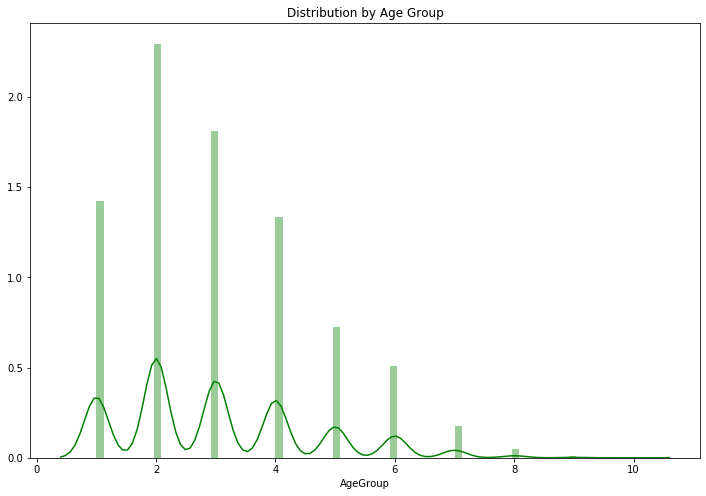

In [47]:
# plot: Age Agroups
plt.figure(figsize=(12, 8))
tl_dist = sns.distplot(df10['AgeGroup'], color='g', bins=75, hist_kws={'alpha': 0.4});
tl_dist.set_title("Distribution by Age Group")

##### Rearrange Columns: AgeGroup

In [87]:
df10.columns

Index(['Id', 'TotalLoan', 'Gender', 'Education', 'MaritalStatus', 'Age', 'HstPaySep15',
       'HstPayAug15', 'HstPayJul15', 'HstPayJun15', 'HstPayMay15', 'HstPayApr15', 'BillSep15',
       'BillAug15', 'BillJul15', 'BillJun15', 'BillMay15', 'BillApr15', 'PaySep15', 'PayAug15',
       'PayJul15', 'PayJun15', 'PayMay15', 'PayApr15', 'DefaultPayment', 'AgeGroup'],
      dtype='object')

In [88]:
cols = df10.columns.tolist()

In [89]:
cols

['Id',
 'TotalLoan',
 'Gender',
 'Education',
 'MaritalStatus',
 'Age',
 'HstPaySep15',
 'HstPayAug15',
 'HstPayJul15',
 'HstPayJun15',
 'HstPayMay15',
 'HstPayApr15',
 'BillSep15',
 'BillAug15',
 'BillJul15',
 'BillJun15',
 'BillMay15',
 'BillApr15',
 'PaySep15',
 'PayAug15',
 'PayJul15',
 'PayJun15',
 'PayMay15',
 'PayApr15',
 'DefaultPayment',
 'AgeGroup']

In [91]:
cols = cols[0:4] + cols[-1:] + cols[5:-1]
cols

['Id',
 'TotalLoan',
 'Gender',
 'Education',
 'AgeGroup',
 'Age',
 'HstPaySep15',
 'HstPayAug15',
 'HstPayJul15',
 'HstPayJun15',
 'HstPayMay15',
 'HstPayApr15',
 'BillSep15',
 'BillAug15',
 'BillJul15',
 'BillJun15',
 'BillMay15',
 'BillApr15',
 'PaySep15',
 'PayAug15',
 'PayJul15',
 'PayJun15',
 'PayMay15',
 'PayApr15',
 'DefaultPayment']

In [92]:
df10.columns

Index(['Id', 'TotalLoan', 'Gender', 'Education', 'MaritalStatus', 'Age', 'HstPaySep15',
       'HstPayAug15', 'HstPayJul15', 'HstPayJun15', 'HstPayMay15', 'HstPayApr15', 'BillSep15',
       'BillAug15', 'BillJul15', 'BillJun15', 'BillMay15', 'BillApr15', 'PaySep15', 'PayAug15',
       'PayJul15', 'PayJun15', 'PayMay15', 'PayApr15', 'DefaultPayment', 'AgeGroup'],
      dtype='object')

In [93]:
df10 = df10[cols] 

In [94]:
df10.columns

Index(['Id', 'TotalLoan', 'Gender', 'Education', 'AgeGroup', 'Age', 'HstPaySep15', 'HstPayAug15',
       'HstPayJul15', 'HstPayJun15', 'HstPayMay15', 'HstPayApr15', 'BillSep15', 'BillAug15',
       'BillJul15', 'BillJun15', 'BillMay15', 'BillApr15', 'PaySep15', 'PayAug15', 'PayJul15',
       'PayJun15', 'PayMay15', 'PayApr15', 'DefaultPayment'],
      dtype='object')

##### Remove Attribute: Age

In [95]:
df10 = df10.drop(['Age'], axis=1)

In [96]:
df10.columns

Index(['Id', 'TotalLoan', 'Gender', 'Education', 'AgeGroup', 'HstPaySep15', 'HstPayAug15',
       'HstPayJul15', 'HstPayJun15', 'HstPayMay15', 'HstPayApr15', 'BillSep15', 'BillAug15',
       'BillJul15', 'BillJun15', 'BillMay15', 'BillApr15', 'PaySep15', 'PayAug15', 'PayJul15',
       'PayJun15', 'PayMay15', 'PayApr15', 'DefaultPayment'],
      dtype='object')

In [97]:
df10.head(10)

,Id,TotalLoan,Gender,Education,AgeGroup,HstPaySep15,HstPayAug15,HstPayJul15,HstPayJun15,HstPayMay15,...,BillJun15,BillMay15,BillApr15,PaySep15,PayAug15,PayJul15,PayJun15,PayMay15,PayApr15,DefaultPayment
0,1,20000,2,2,1,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,1,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,3,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,3,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,7,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,3,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,1,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,2,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,3,-2,-2,-2,-2,-1,...,0,13007,13912,0,0,0,13007,1122,0,0
